In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")


Load IPL Datasets

In [3]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

print("Matches shape:", matches.shape)
print("Deliveries shape:", deliveries.shape)


Matches shape: (1095, 20)
Deliveries shape: (260920, 17)


Inspect Data Schema

In [4]:
matches.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [5]:
deliveries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [6]:
matches.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [7]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


Merge Datasets

In [8]:
ipl_df = deliveries.merge(
    matches,
    how="left",
    left_on="match_id",
    right_on="id"
)

print("Merged dataset shape:", ipl_df.shape)


Merged dataset shape: (260920, 37)


Missing Value Analysis

In [9]:
ipl_df.isnull().sum().sort_values(ascending=False).head(15)


,0
method,257274
fielder,251566
dismissal_kind,247970
player_dismissed,247970
extras_type,246795
city,12397
result_margin,4124
winner,490
player_of_match,490
target_overs,309


Handle Missing Values

In [11]:
ipl_df["venue"] = ipl_df["venue"].fillna("Unknown")
ipl_df["winner"] = ipl_df["winner"].fillna("No Result")
ipl_df["player_dismissed"] = ipl_df["player_dismissed"].fillna("None")
ipl_df = ipl_df.fillna(0)  # for remaining numeric columns


Date Formatting

In [12]:
ipl_df["date"] = pd.to_datetime(ipl_df["date"], errors="coerce")


Normalize Numeric Columns

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_cols = ["total_runs", "batsman_runs", "extra_runs"]
ipl_df[num_cols] = scaler.fit_transform(ipl_df[num_cols])


EXPLORATORY DATA ANALYSIS (EDA)



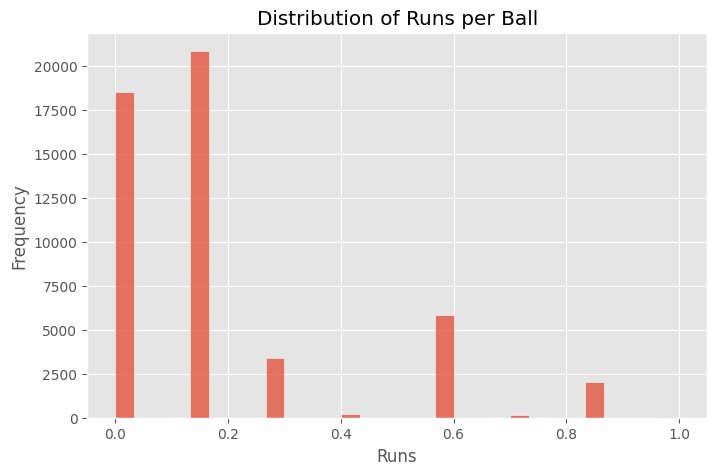

In [14]:
##Runs Distribution
plt.figure(figsize=(8,5))
sns.histplot(ipl_df["total_runs"], bins=30)
plt.title("Distribution of Runs per Ball")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()


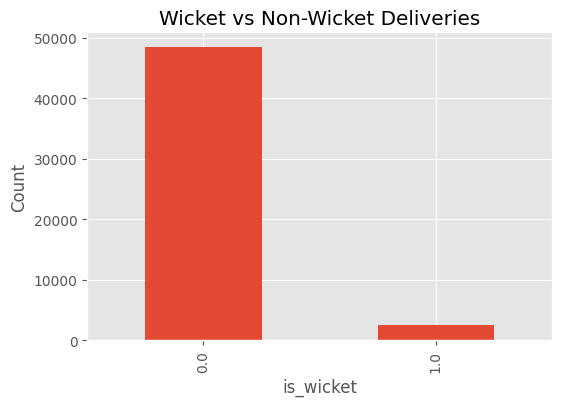

In [15]:
##Wickets Analysis
plt.figure(figsize=(6,4))
ipl_df["is_wicket"].value_counts().plot(kind="bar")
plt.title("Wicket vs Non-Wicket Deliveries")
plt.ylabel("Count")
plt.show()


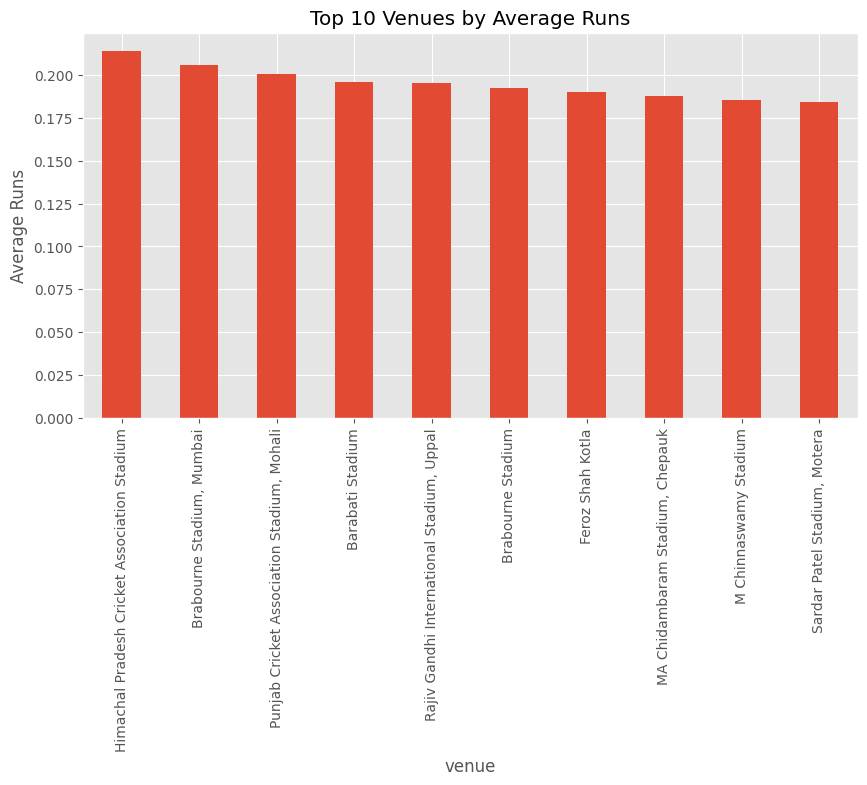

In [16]:
##Venue-wise Statistics
venue_avg_runs = ipl_df.groupby("venue")["total_runs"].mean().sort_values(ascending=False).head(10)

venue_avg_runs.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Venues by Average Runs")
plt.ylabel("Average Runs")
plt.show()


Team Performance (Match Wins)

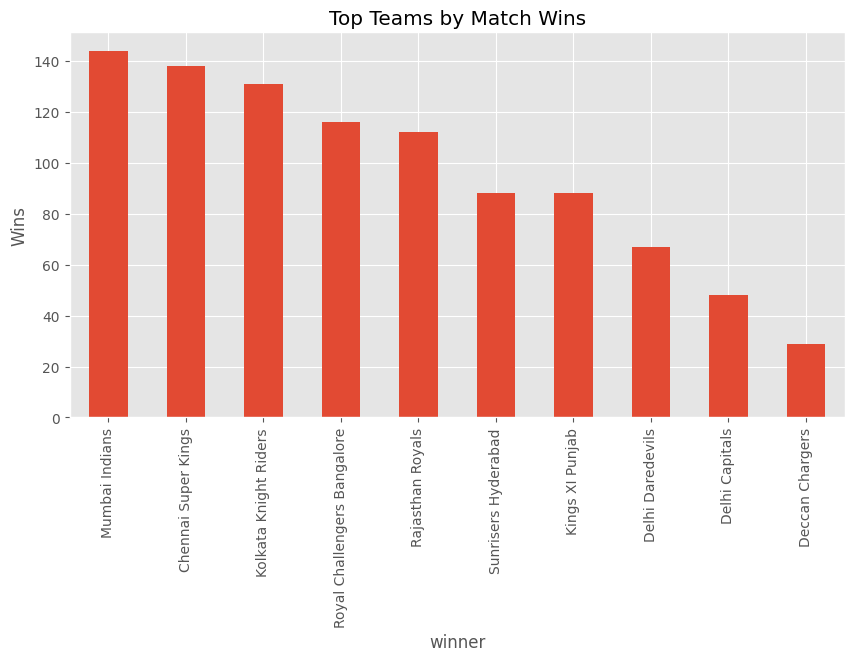

In [17]:
top_teams = matches["winner"].value_counts().head(10)

top_teams.plot(kind="bar", figsize=(10,5))
plt.title("Top Teams by Match Wins")
plt.ylabel("Wins")
plt.show()
